# Evaluation metrics for ML models

In this notebook, we use a simple spam/not spam confusion matrix as if it was obtained from the predictions of a machine learning model for e-mail classification.  

## Import necessary libraries

In [11]:
from typing import Tuple

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Confusion matrix to be used in this example

In [3]:
confusion_matrix = pd.DataFrame(
    {"Predicted Spam": [30, 5], "Predicted Not Spam": [10, 55]},
    index=["Actual Spam", "Actual Not Spam"],
)
confusion_matrix

,Predicted Spam,Predicted Not Spam
Actual Spam,30,10
Actual Not Spam,5,55


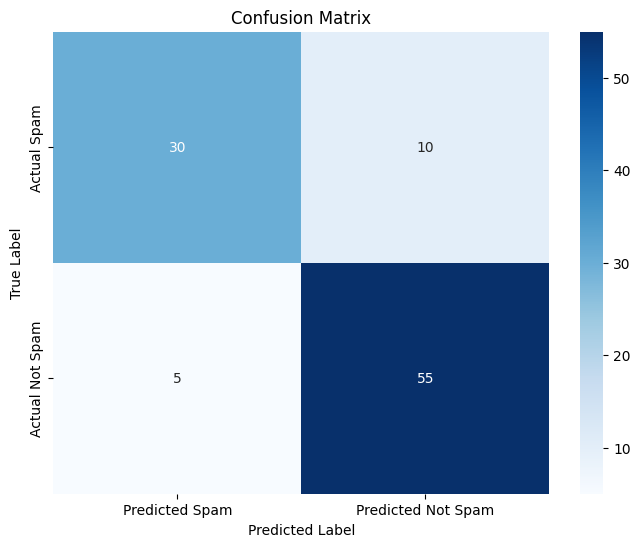

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Evaluation metrics

In [4]:
def accuracy(
    true_positive: int, true_negative: int, false_positive: int, false_negative: int
) -> float:
    return (true_positive + true_negative) / (
        true_positive + true_negative + false_positive + false_negative
    )

def precision(true_positive: int, false_positive: int) -> float:
    return true_positive / (true_positive + false_positive)


def recall(true_positive: int, false_negative: int) -> float:
    return true_positive / (true_positive + false_negative)


def specificity(true_negative: int, false_positive: int) -> float:
    return true_negative / (true_negative + false_positive)


def f1_score(precision_value: float, recall_value: float) -> float:
    return 2 * (precision_value * recall_value) / (precision_value + recall_value)

## Extract values from the confusion matrix

In [5]:
true_positive = confusion_matrix.loc["Actual Spam", "Predicted Spam"]
false_negative = confusion_matrix.loc["Actual Spam", "Predicted Not Spam"]
false_positive = confusion_matrix.loc["Actual Not Spam", "Predicted Spam"]
true_negative = confusion_matrix.loc["Actual Not Spam", "Predicted Not Spam"]

## Calculate metrics

In [6]:
accuracy_value = accuracy(true_positive, true_negative, false_positive, false_negative)
precision_value = precision(true_positive, false_positive)
recall_value = recall(true_positive, false_negative)
specificity_value = specificity(true_negative, false_positive)
f1_score_value = f1_score(precision_value, recall_value)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_value:.2f}")
print(f"Precision: {precision_value:.2f}")
print(f"Recall: {recall_value:.2f}")
print(f"Specificity: {specificity_value:.2f}")
print(f"F1 Score: {f1_score_value:.2f}")


Evaluation Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.75
Specificity: 0.92
F1 Score: 0.80
